# ***Part 1:K-Nearest neighbors Algorithm***

In [353]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [354]:
penguins = pd.read_csv("penguins.csv")
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [355]:
penguins = penguins.apply(pd.to_numeric,errors='ignore')
print(penguins.dtypes)

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


In [356]:
penguis=penguins.dropna()

In [357]:
penguins.describe(include="all")

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [358]:
penguins.fillna(penguins.median(),inplace=True)
print(penguins.isnull().sum())

rowid                 0
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64


<ipython-input-358-78650342c5f7>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins.fillna(penguins.median(),inplace=True)


In [359]:
#Replace the null/junk rows of the column Sex with its mode
mode_sex = penguins['sex'].mode()[0]
penguins['sex'].fillna(mode_sex,inplace=True)


In [360]:
# Filling null values of billlen, billdepth, flipper_length_mm and body_mass_g by their mean grouped by species.
penguins['bill_length_mm'].fillna(penguins.groupby('species')['bill_length_mm'].transform('mean'), inplace=True)
penguins['bill_depth_mm'].fillna(penguins.groupby('species')['bill_depth_mm'].transform('mean'), inplace=True)
penguins['flipper_length_mm'].fillna(penguins.groupby('species')['flipper_length_mm'].transform('mean'), inplace=True)
penguins['body_mass_g'].fillna(penguins.groupby('species')['body_mass_g'].transform('mean'), inplace=True)


In [361]:
X=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
for dataset in X:
   penguins[dataset].fillna(0,inplace=True)

In [362]:
penguins.describe(include="all")

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,344.000000,344.000000,344.000000,344.000000,344,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,179,NaN
mean,172.500000,NaN,NaN,43.925000,17.152035,200.892442,4200.872093,NaN,2008.029070
std,99.448479,NaN,NaN,5.443792,1.969060,14.023826,799.696532,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.275000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [363]:
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.50,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.30,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,44.45,17.3,197.0,4050.0,male,2007
4,5,Adelie,Torgersen,36.70,19.3,193.0,3450.0,female,2007


In [364]:
pd.get_dummies(penguins['sex'].head())

,female,male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [365]:

se=pd.get_dummies(penguins['sex'], drop_first=True)
se.head(3)

,male
0,1
1,0
2,0


In [366]:

penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [367]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

penguins['island']= le.fit_transform(penguins['island'])

penguins['island']

0      2
1      2
2      2
3      2
4      2
      ..
339    1
340    1
341    1
342    1
343    1
Name: island, Length: 344, dtype: int64

In [368]:
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,2,39.10,18.7,181.0,3750.0,male,2007
1,2,Adelie,2,39.50,17.4,186.0,3800.0,female,2007
2,3,Adelie,2,40.30,18.0,195.0,3250.0,female,2007
3,4,Adelie,2,44.45,17.3,197.0,4050.0,male,2007
4,5,Adelie,2,36.70,19.3,193.0,3450.0,female,2007


In [369]:
penguins2=pd.concat([penguins,se],axis=1)

In [370]:
penguins2.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,male
0,1,Adelie,2,39.10,18.7,181.0,3750.0,male,2007,1
1,2,Adelie,2,39.50,17.4,186.0,3800.0,female,2007,0
2,3,Adelie,2,40.30,18.0,195.0,3250.0,female,2007,0
3,4,Adelie,2,44.45,17.3,197.0,4050.0,male,2007,1
4,5,Adelie,2,36.70,19.3,193.0,3450.0,female,2007,0


In [371]:
penguins2.drop('sex',axis=1, inplace=True);




In [372]:
penguins2.rename(columns={'male': 'sex'}, inplace=True)


In [373]:
penguins2.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex
0,1,Adelie,2,39.10,18.7,181.0,3750.0,2007,1
1,2,Adelie,2,39.50,17.4,186.0,3800.0,2007,0
2,3,Adelie,2,40.30,18.0,195.0,3250.0,2007,0
3,4,Adelie,2,44.45,17.3,197.0,4050.0,2007,1
4,5,Adelie,2,36.70,19.3,193.0,3450.0,2007,0


In [374]:
print(penguins.isnull().sum())

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [375]:
X = penguins2 [["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].to_numpy()

y_classif= pd.Categorical (penguins2 [ "sex"]).astype('category').codes
y_classif


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [376]:
from sklearn import model_selection
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y_classif, test_size=0.25, random_state=25, stratify=y_classif)


In [377]:
from sklearn import neighbors
knnclass = neighbors.KNeighborsClassifier(n_neighbors=7)

In [378]:
knnclass.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [379]:
y_test_pred= knnclass.predict(X_test)

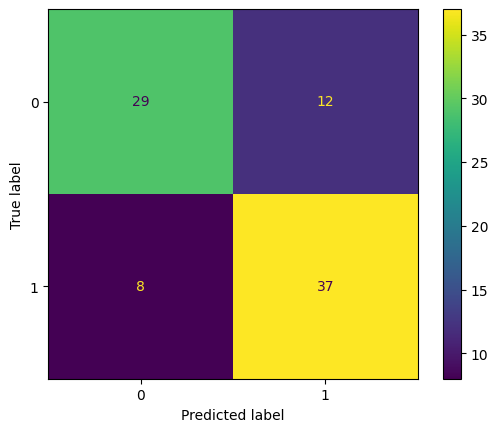

In [380]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(knnclass,X_test,y_test)
plt.show()

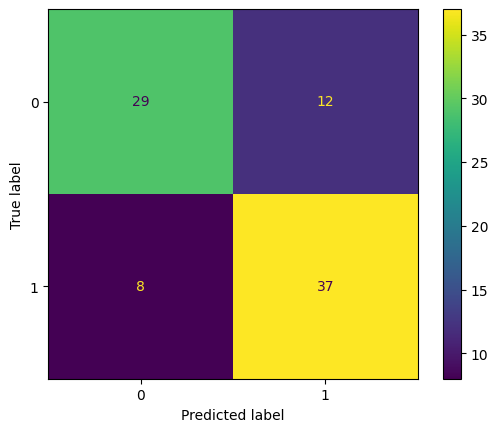

In [381]:
matrice_confusion = metrics.ConfusionMatrixDisplay.from_estimator(knnclass, X_test, y_test).confusion_matrix
nb_hommes_faux_positifs = matrice_confusion[0][1]
nb_femmes_faux_negatifs = matrice_confusion[1][0]
nb_corrects = np.sum(matrice_confusion.diagonal())
nb_total = np.sum(matrice_confusion)


In [382]:
print("%d manchots mâles ont été incorrectement prédits femelles." % nb_hommes_faux_positifs)
print("%d manchots femelles ont été incorrectement prédits mâles." % nb_femmes_faux_negatifs)
print("%.2f %% des prédictions du modèle sur le jeu de test sont correctes." % (100 * nb_corrects/nb_total))

12 manchots mâles ont été incorrectement prédits femelles.
8 manchots femelles ont été incorrectement prédits mâles.
76.74 % des prédictions du modèle sur le jeu de test sont correctes.


In [383]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_values = [5, 7, 9, 13, 15, 17, 19, 21]
params = {'n_neighbors': k_values}
model = KNeighborsClassifier()
knnclass_cv = GridSearchCV(model, params, cv=5, scoring='accuracy')
knnclass_cv.fit(X_train, y_train)

print("La valeur optimale de k est %d, pour une accuracy cross-validée de %.2f%%. " % (knnclass_cv.best_params_['n_neighbors'], (100 * knnclass_cv.best_score_)))


La valeur optimale de k est 5, pour une accuracy cross-validée de 80.20%. 


In [384]:
y_test_pred = knnclass_cv.best_estimator_.predict(X_test)
matrice_confusion = metrics.confusion_matrix(y_test, y_test_pred)
faux_positifs = matrice_confusion[0][1]
faux_negatifs = matrice_confusion[1][0]
nb_corrects = np.sum(np.diag(matrice_confusion))
nb_total = np.sum(matrice_confusion)



In [385]:
print("%d manchots mâles ont été incorrectement prédits femelles." % faux_positifs)
print("%d manchots femelles ont été incorrectement prédits mâles." % faux_negatifs)
print("%.2f %% des prédictions du modèle sur le jeu de test sont correctes." % (100 * nb_corrects / nb_total))

13 manchots mâles ont été incorrectement prédits femelles.
8 manchots femelles ont été incorrectement prédits mâles.
75.58 % des prédictions du modèle sur le jeu de test sont correctes.


**Nearest neighbors for regression**

In [386]:
knnreg =neighbors.KNeighborsRegressor(n_neighbors=7)

In [387]:
knnreg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [388]:
y_test_pred = knnreg.predict(X_test)

In [389]:
from sklearn import metrics
print("RMSE de notre modèle est %.2f g" % (np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("Le coefficient de détermination de notre modèle est R2 = %.2f" % (metrics.r2_score(y_test, y_test_pred)))


RMSE de notre modèle est 0.40 g
Le coefficient de détermination de notre modèle est R2 = 0.34


# ***Part 2:Logistic regression algorithm***

La probabilité qu'un manchot soit mâle est prédite à 0.57
L'équation de régression logistique est :
0.77 x L1 + 2.24 x L2 + 1.59 x L3 + 0.28
L'accuracy des prédictions du modèle sur l'ensemble de test est de 0.78


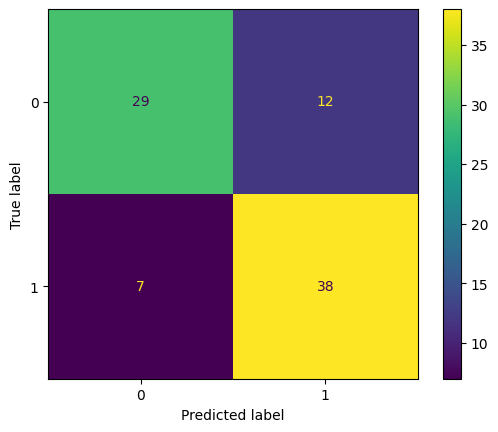

In [390]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prédiction des étiquettes pour l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calcul des probabilités que chaque manchot soit mâle
probabilites = model.predict_proba(X_test_scaled)[:, 1]

print("La probabilité qu'un manchot soit mâle est prédite à %.2f" % (np.mean(probabilites)))

# Affichage de l'équation de régression logistique
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("L'équation de régression logistique est :")
print("%.2f x L1 + %.2f x L2 + %.2f x L3 + %.2f" % (coefficients[0], coefficients[1], coefficients[2], intercept))

# Calcul de l'accuracy des prédictions du modèle sur l'ensemble de test
accuracy = metrics.accuracy_score(y_test, y_pred)
print("L'accuracy des prédictions du modèle sur l'ensemble de test est de %.2f" % accuracy)

# Affichage de la matrice de confusion
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()


Data separation in K Folds

Accuracy d'entraînement : 0.81 (+/- 0.014)
Accuracy test = 77.91% des prédictions du modèle sur le jeu de test sont correctes.


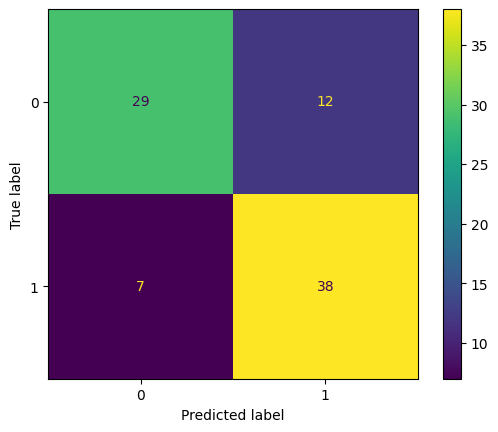

In [391]:
from sklearn.model_selection import KFold
model = LogisticRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
kfold = KFold(n_splits=5, random_state=25 ,shuffle=True)

# Calculer la performance en validation croisée
results = cross_val_score(model,
                          X_train_scaled,
                          y_train,
                          cv=kfold,
                          scoring='accuracy')
print("Accuracy d'entraînement : %.2f (+/- %.3f)" % (results.mean(), results.std()))

# Entrainer le modèle sur le jeu d'entrainement total
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy test = %.2f%% des prédictions du modèle sur le jeu de test sont correctes." % (100 * metrics.accuracy_score(y_test, y_pred)))

metrics.ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()


# ***Part 3:Support Vector Machine Algorithm***

In [392]:
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,2,39.10,18.7,181.0,3750.0,male,2007
1,2,Adelie,2,39.50,17.4,186.0,3800.0,female,2007
2,3,Adelie,2,40.30,18.0,195.0,3250.0,female,2007
3,4,Adelie,2,44.45,17.3,197.0,4050.0,male,2007
4,5,Adelie,2,36.70,19.3,193.0,3450.0,female,2007


(276, 2)
(276,)


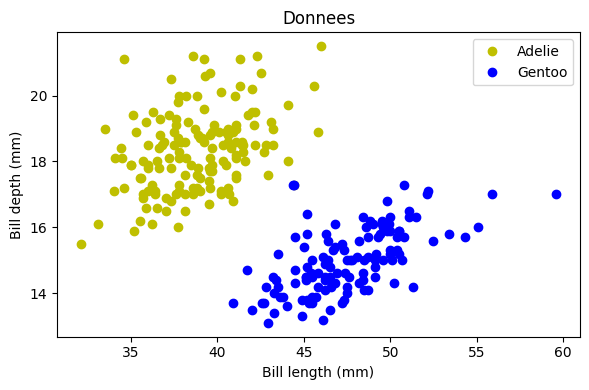

In [393]:
data= penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm","body_mass_g"]].to_numpy()

labels= pd.Categorical (penguins [ "species"]).astype('category').codes
y=labels
# Sélectionner les données correspondant aux espèces Adelie et Gentoo
Adelie_or_Gentoo = (y == 0) | (y == 2)
X = data[:, :2][Adelie_or_Gentoo]  # Sélectionner les deux premières colonnes de data pour Adelie et Gentoo
y=y[Adelie_or_Gentoo]
print(X.shape)
print(y.shape)

# Afficher les données
plt.figure(figsize=(6, 4))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Adelie")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bo", label="Gentoo")
#Legend
plt.legend(["Adelie", "Gentoo"])
plt.xlabel("Bill length (mm)")
plt.ylabel("Bill depth (mm)")
plt.title("Donnees")
plt.tight_layout()
plt.show()


Score de la SVM linéaire (C=100.00) (accuracy moyenne) : 1.00


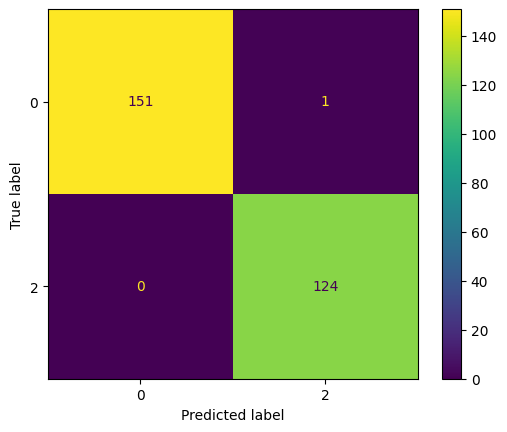

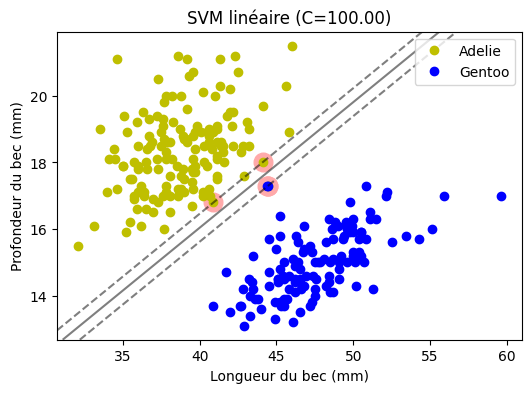

Score de la SVM linéaire (C=0.10) (accuracy moyenne) : 0.99


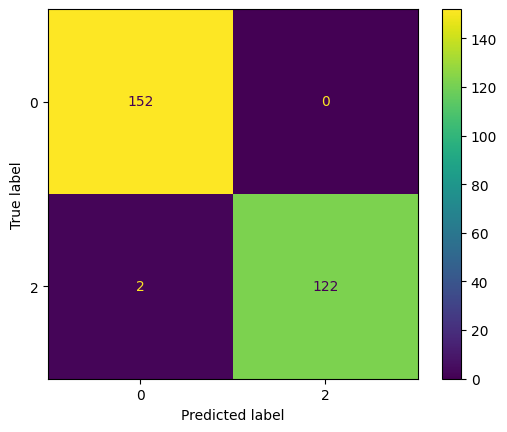

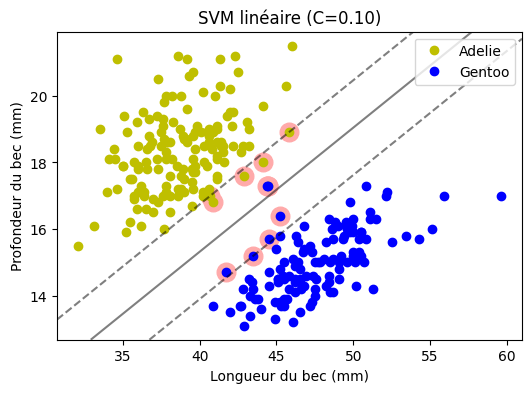

In [399]:
from sklearn import svm
from sklearn import metrics

# Initialisation
for C1 in [100, 0.1]:
    model_svc1 = svm.SVC(kernel='linear', C=C1)  # Initialiser le modèle SVC avec le paramètre C donné

    # Entraînement
    model_svc1.fit(X, y)

    # Évaluation
    score1 = model_svc1.score(X, y)
    print("Score de la SVM linéaire (C=%.2f) (accuracy moyenne) : %.2f" % (C1, score1))

    # Afficher la matrice de confusion
    metrics.ConfusionMatrixDisplay.from_predictions(y, model_svc1.predict(X))

    # Afficher les données
    plt.figure(figsize=(6, 4))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Adelie")
    plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "bo", label="Gentoo")
    # Limites du cadre
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.scatter(model_svc1.support_vectors_[:, 0], model_svc1.support_vectors_[:, 1],
               linewidth=1, facecolors='#FFAAAA', s=180)

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Prédire pour les points de la grille
    Z = model_svc1.decision_function(xy).reshape(XX.shape)

    # Afficher la frontière de décision
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])

    # Légende
    plt.legend()
    plt.xlabel("Longueur du bec (mm)")
    plt.ylabel("Profondeur du bec (mm)")
    plt.title("SVM linéaire (C=%.2f)" % C1)

    plt.show()


Non linear SVM Classification (Radial Basis Function RBF)

(220, 2)
(220,)


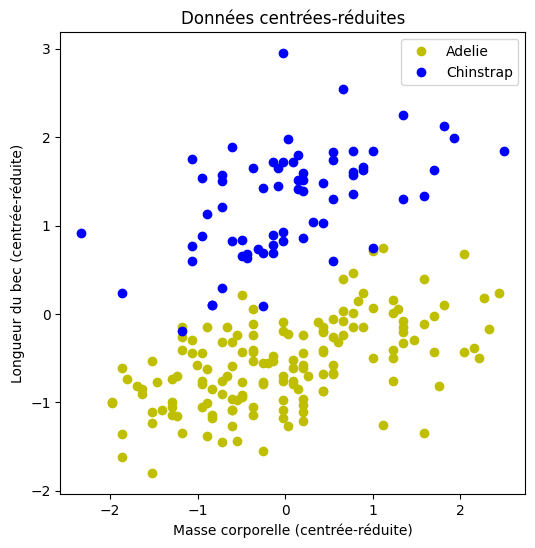

In [407]:
# Sélectionner les données correspondant aux espèces Adelie et Chinstrap
y=labels
Adelie_or_Chinstrap = (y == 0) | (y == 1)
X = data[:,[3,0]][Adelie_or_Chinstrap]  # Sélectionner toutes les colonnes de données
y = y[Adelie_or_Chinstrap]  # Sélectionner les étiquettes correspondant aux espèces Adelie et Chinstrap
print(X.shape)
print(y.shape)

# Standardiser les données
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

# Afficher les données
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label="Adelie")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', label="Chinstrap")  # Afficher les données correspondant à Chinstrap

# Légende
plt.legend()

# Ajouter des labels et un titre
plt.xlabel("Masse corporelle (centrée-réduite)")
plt.ylabel("Longueur du bec (centrée-réduite)")
plt.title("Données centrées-réduites")

plt.show()


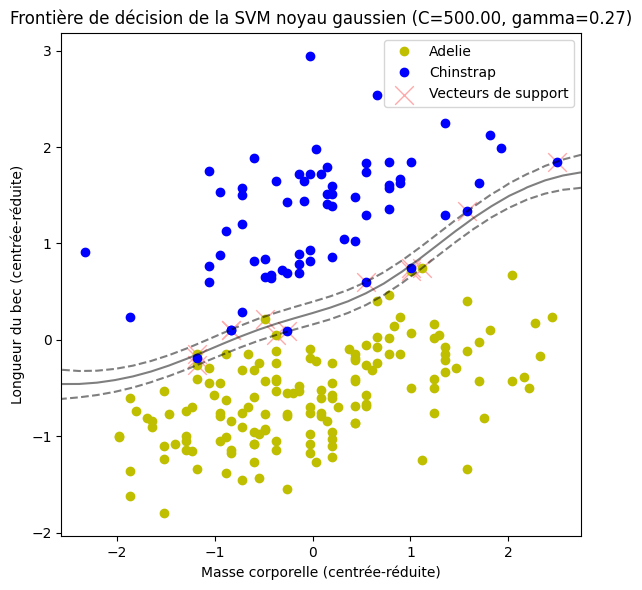

In [411]:
# Initialisation
c = 500
gamma = 0.27
model_svc = svm.SVC(kernel='rbf', gamma=gamma, C=c)

# Entraînement
model_svc.fit(X, y)

# Afficher les données
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label="Adelie")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', label="Chinstrap")
# Limites du cadre
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Marquer les vecteurs de support
plt.scatter(model_svc.support_vectors_[:, 0], model_svc.support_vectors_[:, 1],
            marker='x', linewidth=1, facecolors='#FFAAAA', s=180, label="Vecteurs de support")

# Grille de points sur laquelle appliquer le modèle
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
XY = np.vstack([XX.ravel(), YY.ravel()]).T

# Prédire pour les points de la grille
Z = model_svc.decision_function(XY).reshape(XX.shape)

# Afficher la frontière de décision et la marge
ax.contour(XX, YY, Z, colors='k', alpha=0.5,levels=[-1,0,1],linestyles=['--','-','--'])

# Légende
plt.legend()
plt.xlabel("Masse corporelle (centrée-réduite)")
plt.ylabel("Longueur du bec (centrée-réduite)")
plt.title("Frontière de décision de la SVM noyau gaussien (C=%.2f, gamma=%.2f)" % (c, gamma))
plt.tight_layout()

plt.show()


Score de la SVM à noyau RBF avec (C=500.00, gamma=0.27) (accuracy moyenne) : 0.98


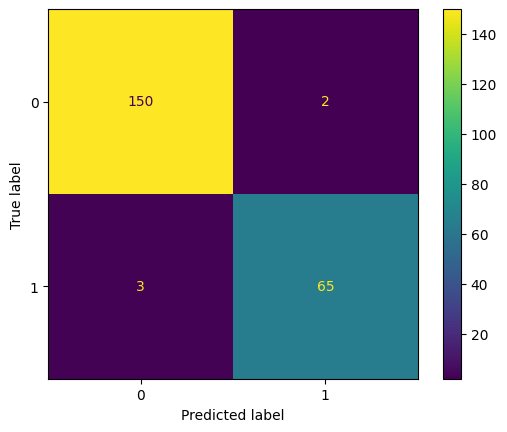

In [414]:
score =model_svc.score(X,y)

print("Score de la SVM à noyau RBF avec (C=%.2f, gamma=%.2f) (accuracy moyenne) : %.2f" % (c, gamma, score))
metrics.ConfusionMatrixDisplay.from_predictions(y, model_svc.predict(X))